# Spaceship Titanic: Data analysis

This notebook is intended for do the first data analysis of the available datasets for the Kaggle problem [Spaceship Titanic](https://www.kaggle.com/competitions/spaceship-titanic/)


We will suggest the following libraries:
- pandas
- seaborn
- ydata-profiling

A quick introduction of Pandas can be found [here](https://pandas.pydata.org/docs/getting_started/index.html).

And a quick introduction of Seaborn can be found [here](https://seaborn.pydata.org/tutorial/introduction.html)


## Imports of libraries

In [8]:
# Imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Apply the default theme of SNS
sns.set_theme()


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# Configuration of Matplotlib inside Jupyter Notebook.
# Read: https://ipython.readthedocs.io/en/stable/interactive/plotting.html
%matplotlib inline
#%matplotlib notebook

## Load dataset
The datasets are in the form of CSV files. Three different files are provided:
- **train.csv**: Contains the whole dataset, i.e., the input features (data of passengers) and the variable to be predicted (Transported: true or false). We will have to split this file into two disjoint datasets:
    - **Train dataset**: used to train our ML models.
    - **Test dataset**: used to validate the behaviour of our models previously to make a submission to Kaggle.
- **test.csv**: This file only contains the input features. We will have to predict the Transported variable and submmit our predictions to Kaggle.
- **sample_submission.csv**: Example file of how to make a submission so that Kaggle can evaluate our model and give us a score.

In [9]:
# We read the dataset with the Pandas library and we create a so called dataframe

titanic = pd.read_csv(
    "data/train.csv",
    index_col="PassengerId"
)
titanic

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True


## Working with Pandas

A quick introduction of Pandas can be found [here](https://pandas.pydata.org/docs/getting_started/index.html).

### Selecting a subset of a Table

- Select specific columns from a DataFrame

In [10]:
ages = titanic["Age"] # returns a Series (single-column)

ages.head()

PassengerId
0001_01    39.0
0002_01    24.0
0003_01    58.0
0003_02    33.0
0004_01    16.0
Name: Age, dtype: float64

In [11]:
type(ages)

print("Shape", ages.shape)

Shape (8693,)


- Select several columns from a dataframe   

In [12]:
age_home_planet = titanic[["Age", "HomePlanet"]]
age_home_planet.head()

,Age,HomePlanet
PassengerId,,
0001_01,39.0,Europa
0002_01,24.0,Earth
0003_01,58.0,Europa
0003_02,33.0,Europa
0004_01,16.0,Earth


- Filter specific rows


In [13]:
below_16 = titanic[titanic["Age"]<=16]
below_16.head()

print("Numer of children", below_16.shape[0])

Numer of children 1387


- More complex filtering

- Working with missing values: use functions `isna()` and `notna()`
- Filling missing values: `fillna()`

In [14]:
print("# Number of missing values in each column")

for colname in titanic:
    num_nans = titanic[ titanic[colname].isna()].shape[0]
    print(f"{colname:12}:  missing {num_nans:5} values ({num_nans/titanic.shape[0]*100:2.2f} %)")

# Number of missing values in each column
HomePlanet  :  missing   201 values (2.31 %)
CryoSleep   :  missing   217 values (2.50 %)
Cabin       :  missing   199 values (2.29 %)
Destination :  missing   182 values (2.09 %)
Age         :  missing   179 values (2.06 %)
VIP         :  missing   203 values (2.34 %)
RoomService :  missing   181 values (2.08 %)
FoodCourt   :  missing   183 values (2.11 %)
ShoppingMall:  missing   208 values (2.39 %)
Spa         :  missing   183 values (2.11 %)
VRDeck      :  missing   188 values (2.16 %)
Name        :  missing   200 values (2.30 %)
Transported :  missing     0 values (0.00 %)


### Obtaining statatiscs with Pandas

In [15]:
# Describe a numerical variable. Specific statistic can be obtain with mean, std, median, etc
titanic[["Age"]].describe()

,Age
count,8514.000000
mean,28.827930
std,14.489021
min,0.000000
25%,19.000000
50%,27.000000
75%,38.000000
max,79.000000


In [16]:
# Describe a categorical variable
titanic["HomePlanet"].describe()

count      8492
unique        3
top       Earth
freq       4602
Name: HomePlanet, dtype: object

In [17]:
# Calculate the mean Age grouping by HomePlanet
titanic[["HomePlanet", "Age"]].groupby("HomePlanet").mean()

,Age
HomePlanet,
Earth,26.068232
Europa,34.419664
Mars,29.297203


In [18]:
# Obtain the count of each element in a categorical variable
titanic["HomePlanet"].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

### Add new columns and operate with them

In [19]:
# Add a new column that is the total amount of money spent (sum of three columns)

titanic["TotalSpent"] = titanic["RoomService"] + titanic["ShoppingMall"] + titanic["Spa"] + titanic["FoodCourt"] + titanic["VRDeck"]

titanic.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpent
PassengerId,,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0


Divide the string Cabin for obtaining the deck, num and side:

Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

Deck = Cubierta

Port = Babor (lado izquierdo)

Starboard = Estribor (Lado derecho)


In [20]:
# Operate with text column Cabin and split with "/" character for creating three new columns

titanic["CabinDeck"] = titanic["Cabin"].str.split("/").str.get(0)
titanic["CabinNum"] = titanic["Cabin"].str.split("/").str.get(1)
titanic["CabinSide"] = titanic["Cabin"].str.split("/").str.get(2)

In [21]:
titanic["CabinDeck"].value_counts()

CabinDeck
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: count, dtype: int64

In [22]:
titanic["CabinSide"].value_counts()

CabinSide
S    4288
P    4206
Name: count, dtype: int64

In [23]:
titanic["CabinNum"].describe()

count     8494
unique    1817
top         82
freq        28
Name: CabinNum, dtype: object

### Plotting with Pandas

With a simple dataframe you can just use `table.plot()`

Check the [plot guide of Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

In [24]:
earth_europe = titanic[titanic["HomePlanet"].isin(["Earth", "Europe"])]
print("Number of passengers from Europe or Earth:", earth_europe.shape[0])

# If using advanced conditions, use & and |, and surround each condition by brackets ()

Number of passengers from Europe or Earth: 4602


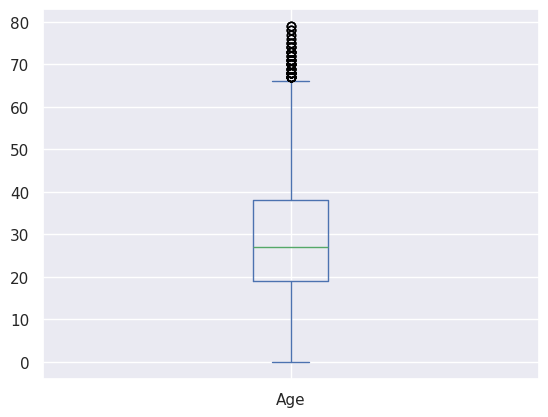

In [25]:
# Plotting the age of the passengers with a Boxplot
ages = titanic["Age"]
ages.plot.box()
plt.show()

<Axes: xlabel='HomePlanet'>

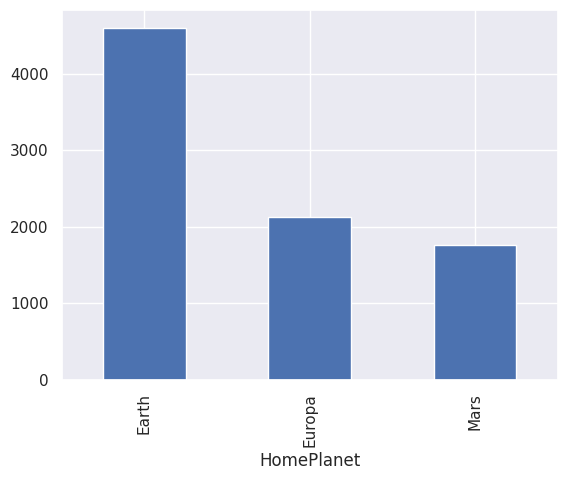

In [26]:
# Bar plot with the Home Planet

counts_HomePlanet = titanic['HomePlanet'].value_counts()

counts_HomePlanet.plot.bar()

<Axes: xlabel='Destination'>

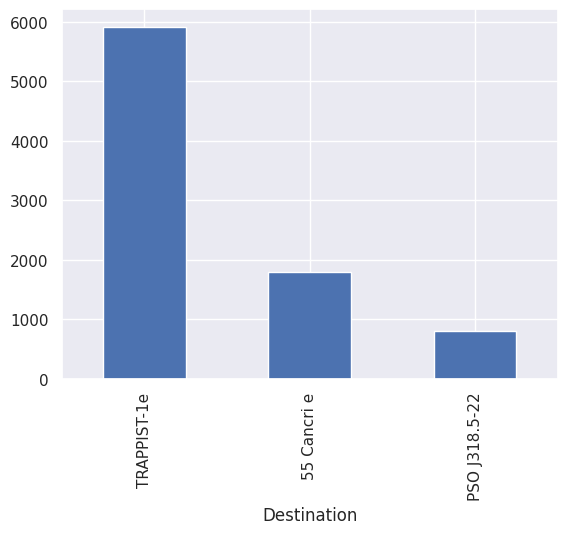

In [27]:
# Plots Destination sorted
counts_Destination = titanic["Destination"].value_counts(sort=True)

counts_Destination.plot.bar()

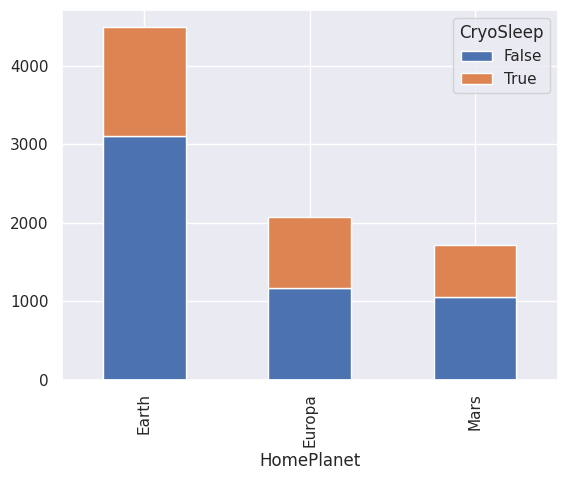

In [28]:
# Plot CryoSleep vs HomePlanet
homeplanet_cryosleep = titanic[['HomePlanet', 'CryoSleep']]

# generate a frequency count of each category for each variable
counts = homeplanet_cryosleep.groupby(['HomePlanet', 'CryoSleep']).size().reset_index(name='count')

# create a stacked bar plot
fig, ax = plt.subplots()
ax = counts.pivot(index='HomePlanet', columns='CryoSleep', values='count').plot(kind='bar', stacked=True, ax=ax)
plt.show()

## Working with Seaborn

And a quick introduction of Seaborn can be found [here](https://seaborn.pydata.org/tutorial/introduction.html)

In [29]:
# Remember the columns of the titanic dataframe
titanic.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpent,CabinDeck,CabinNum,CabinSide
PassengerId,,,,,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,B,0,P
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,F,0,S
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,A,0,S
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,A,0,S
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,F,1,S


We show the use of the function `relplot()`, that it is designed to visualize many different statistical relationships. 

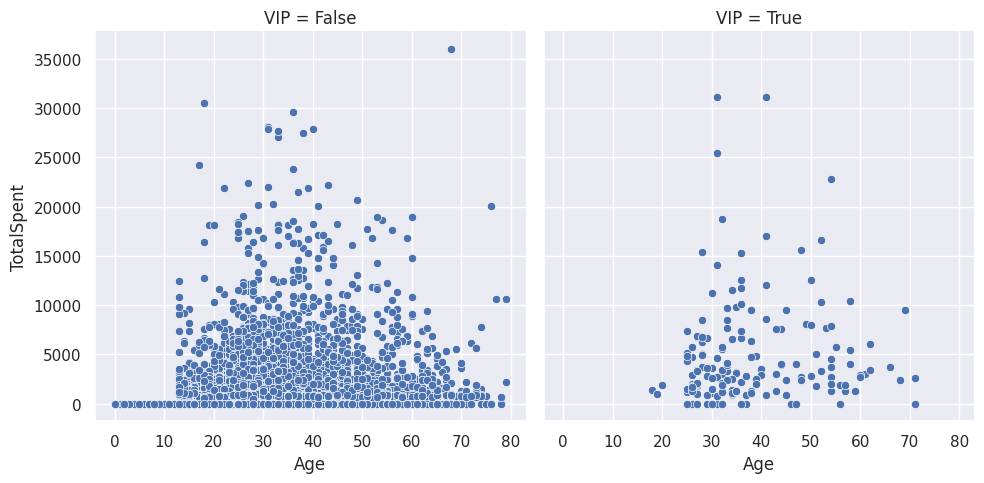

In [30]:
# Create a visualization
sns.relplot(
    data=titanic,
    x="Age", y="TotalSpent", col="VIP")

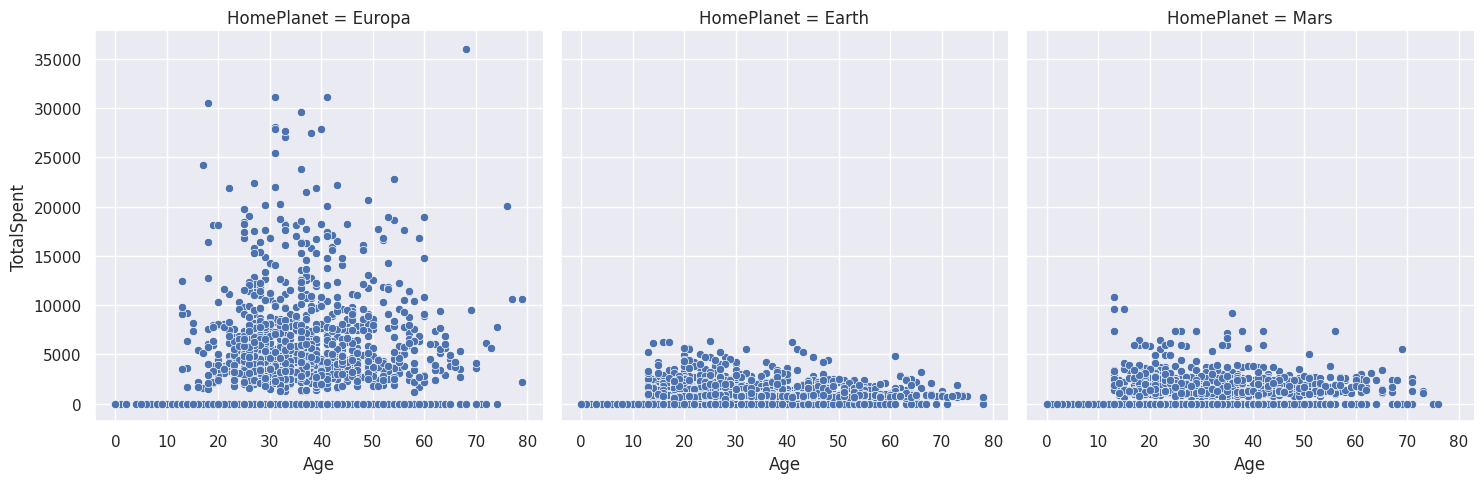

In [31]:
# Create a visualization
sns.relplot(
    data=titanic,
    x="Age", y="TotalSpent", col="HomePlanet")

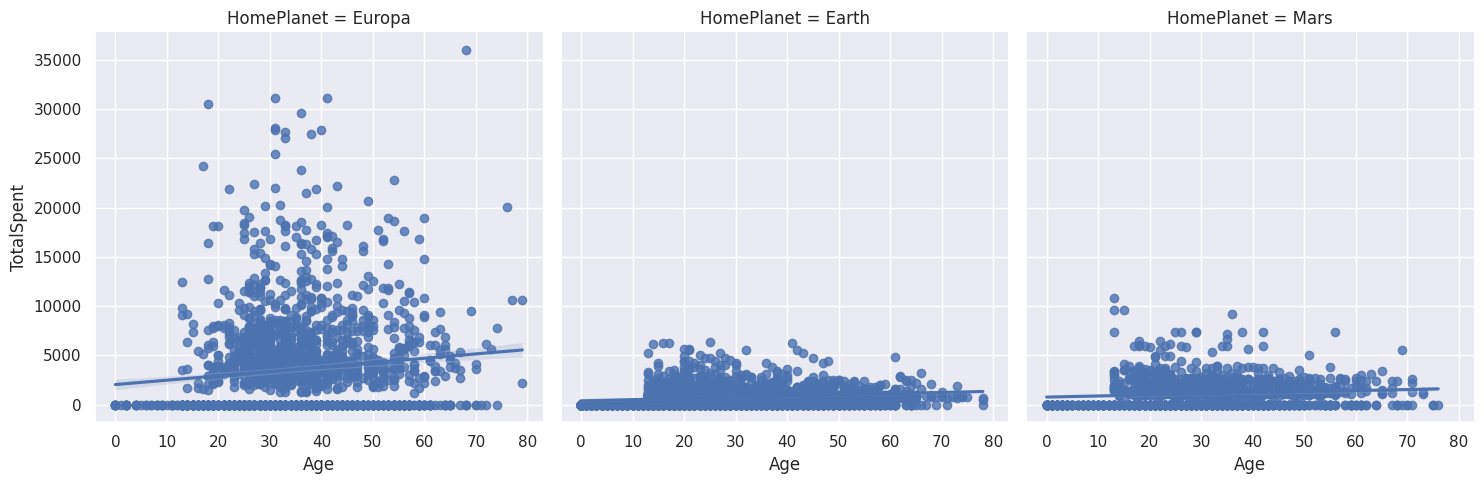

In [32]:
# Plot the average TotalSpent as function of the age for the three differnt HomePlanet
sns.lmplot(data=titanic, x="Age", y="TotalSpent", col="HomePlanet")

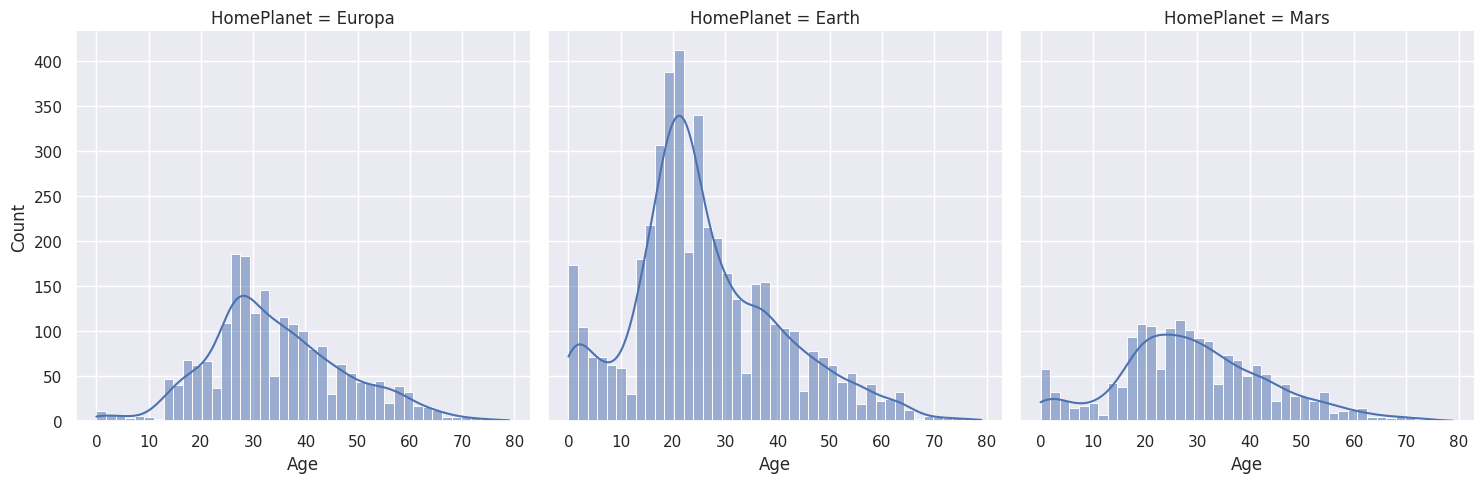

In [33]:
# Plot the distribution of one variable (Age) for different HomePlanet
sns.displot(data=titanic, x="Age", col="HomePlanet", kde=True)

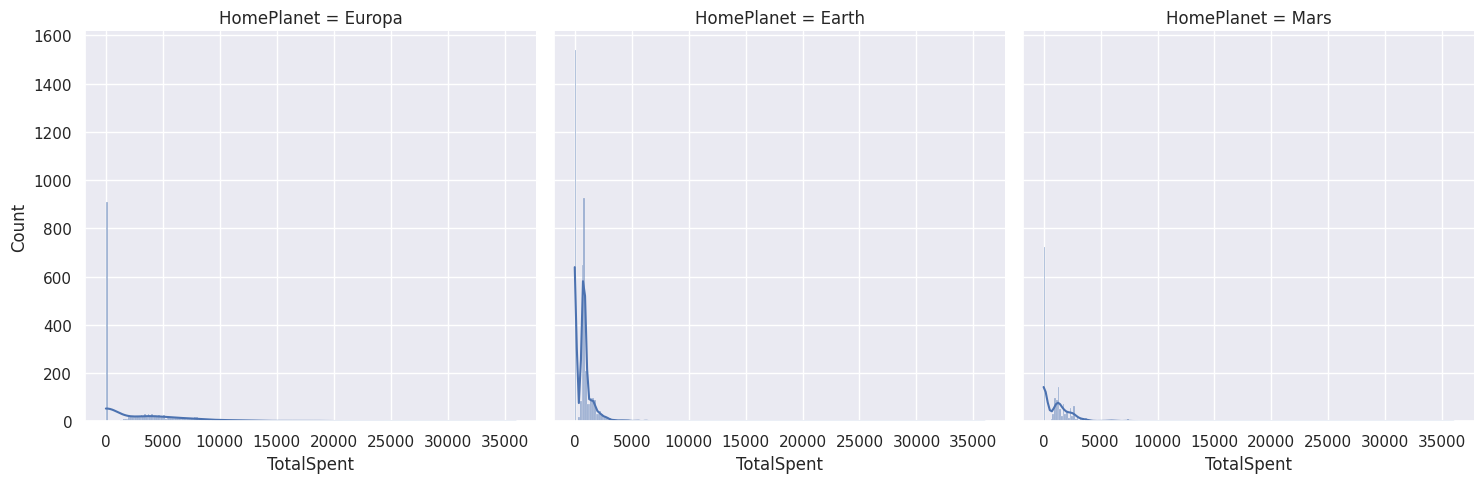

In [34]:
# Plot the distribution of one variable (TotalSpent) for different HomePlanet
sns.displot(data=titanic, x="TotalSpent", col="HomePlanet", kde=True, )